# **FLIGHT PRICE PREDICTION**

### **PROJECT- FOUNDATIONS OF DATA SCIENCE**

### **Collection Of Dataset**
This is the processed dataset obtained after merging the economy and business dataset and performing basic feature transformation. This dataset is collected from kaggle. This data collected is not a dummy data which was verified as the kaggle dataset itself mentioned the source to be "Ease My Trip" and not dummy.


In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [308]:
df=pd.read_csv('Clean_Dataset.csv')
#df.columns=df.columns.str.strip()//not needed because the column names are already clean
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [309]:
df.info();
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dty

In [310]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [311]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [312]:
df.shape
print(df.shape)
df.isnull().sum()
df.nunique()


(300153, 11)


airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

### **Removal of duplicates**

In [313]:
df.duplicated().sum()
column_names = df.columns
column_names
categorical_variables = df.dtypes[df.dtypes == "object"].index
categorical_variables
for category in categorical_variables:
    print(f"Number of unique values in {category} = {len(df[category].unique())}")

Number of unique values in airline = 6
Number of unique values in flight = 1561
Number of unique values in source_city = 6
Number of unique values in departure_time = 6
Number of unique values in stops = 3
Number of unique values in arrival_time = 6
Number of unique values in destination_city = 6
Number of unique values in class = 2


### **Exploratory Data Analysis (EDA)**

<br>CATEGORICAL FEATURE ANALYSIS AND RELATIONSHIPS<br>
1. Airline price trends:
   * Compare average price across different airline companies.
   * Identify premium vs. budget airlines based on price distribution.
   * Check if some airlines consistently charge higher/lower prices for the same route.


airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64


/var/folders/27/dpt9v8fj7fg0j3zd8j904zqc0000gn/T/ipykernel_1696/1567809299.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline', y='average_price', data=df_avg, palette='coolwarm')


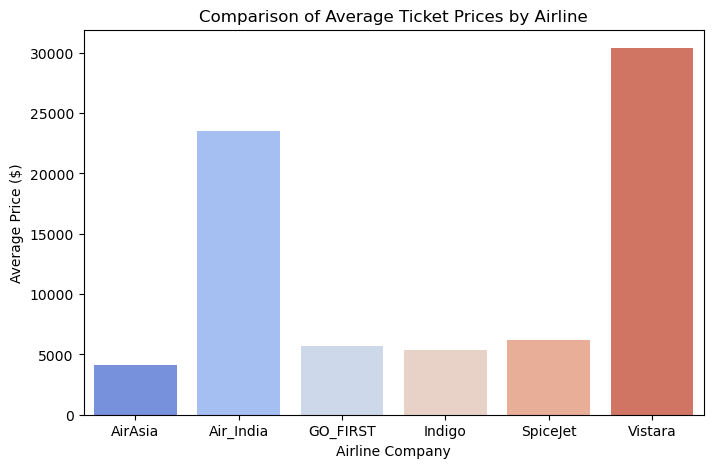

In [314]:
#comparison of average price across different airline companies
average_prices = df.groupby('airline')['price'].mean()
print(average_prices)
df_avg = pd.DataFrame(list(average_prices.items()), columns=['airline', 'average_price'])
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='airline', y='average_price', data=df_avg, palette='coolwarm')
# Labels and Title
plt.xlabel('Airline Company')
plt.ylabel('Average Price ($)')
plt.title('Comparison of Average Ticket Prices by Airline')
# Show Plot
plt.show()

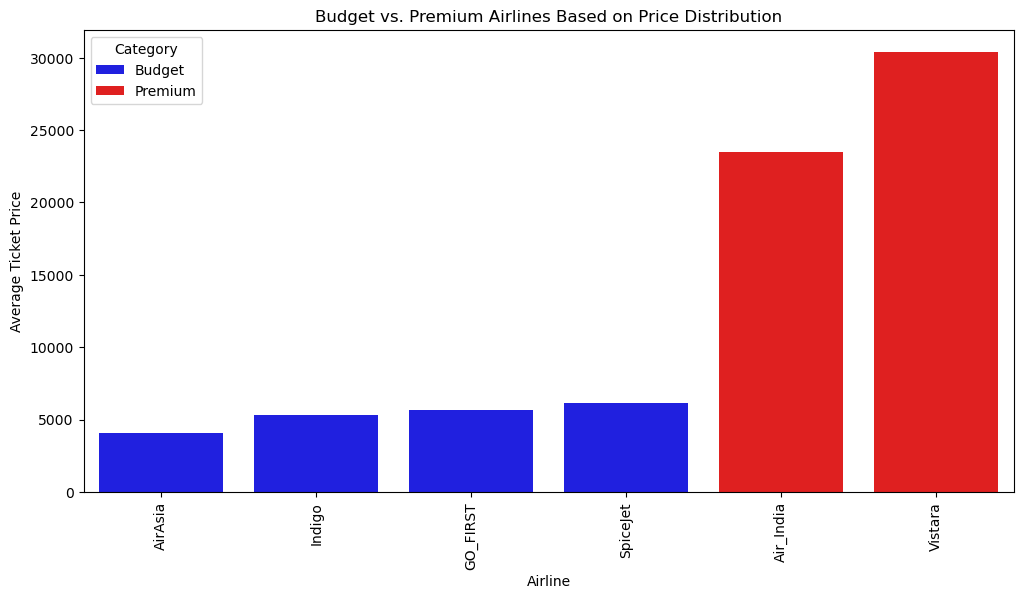

                  price category
airline                         
AirAsia     4091.072742   Budget
Indigo      5324.216303   Budget
GO_FIRST    5652.007595   Budget
SpiceJet    6179.278881   Budget
Air_India  23507.019112  Premium
Vistara    30396.536302  Premium


In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Sample dataset (replace with your actual dataframe)
# df = pd.read_csv("your_data.csv")

# Compute the average price per airline
airline_avg_price = df.groupby('airline')[['price']].mean()

# Apply K-Means clustering (2 clusters: Budget & Premium)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
airline_avg_price['cluster'] = kmeans.fit_predict(airline_avg_price)

# Identify which cluster is Premium (higher avg price)
premium_label = airline_avg_price.groupby('cluster')['price'].mean().idxmax()
budget_label = 1 - premium_label  # The other cluster

# Assign labels
airline_avg_price['category'] = airline_avg_price['cluster'].map({premium_label: 'Premium', budget_label: 'Budget'})

# Sort by price for better visualization
airline_avg_price = airline_avg_price.sort_values(by='price')

# 🎨 Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=airline_avg_price.index, y=airline_avg_price['price'], hue=airline_avg_price['category'], palette={'Budget': 'blue', 'Premium': 'red'})

plt.xticks(rotation=90)
plt.xlabel("Airline")
plt.ylabel("Average Ticket Price")
plt.title("Budget vs. Premium Airlines Based on Price Distribution")
plt.legend(title="Category")
plt.show()

# Print the airline classifications
print(airline_avg_price[['price', 'category']])


compare prices across different source_city to destination_city

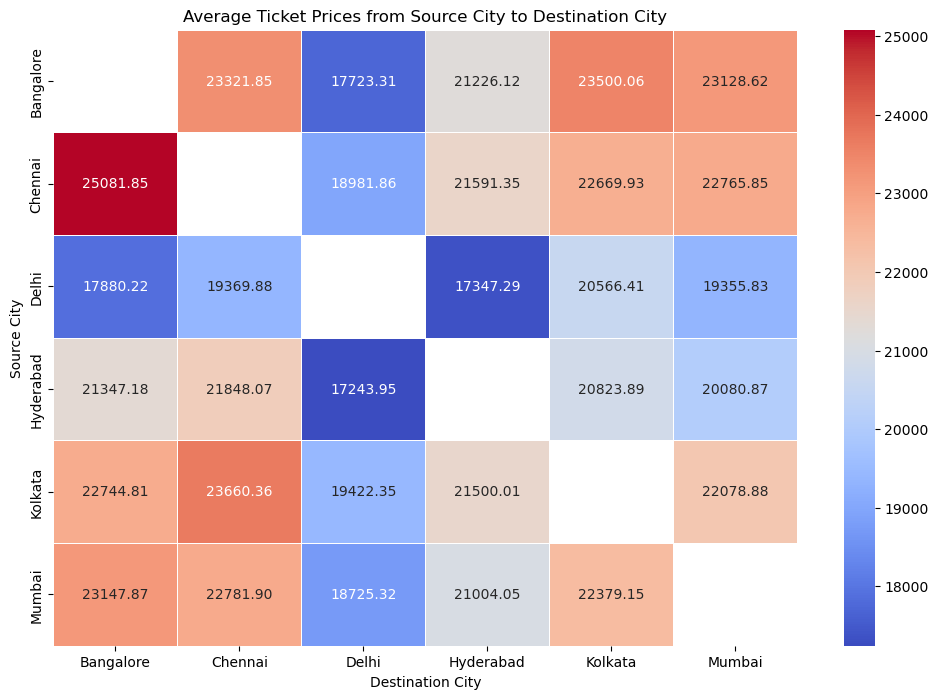

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file (replace with your actual file path)
df = pd.read_csv('flightdata.csv')

# Group by source and destination cities and calculate average price
average_prices = df.groupby(['source_city', 'destination_city'])['price'].mean().reset_index()

# Pivot the data to create a matrix for better visualization (source_city vs. destination_city)
pivot_df = average_prices.pivot(index='source_city', columns='destination_city', values='price')

# Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Labels and Title
plt.title('Average Ticket Prices from Source City to Destination City')
plt.xlabel('Destination City')
plt.ylabel('Source City')

# Show Plot
plt.show()


In [317]:
import pandas as pd

# Sample dataset (replace with your actual dataframe)
# df = pd.read_csv("your_data.csv")

# Compute the average price per route
route_prices = df.groupby(['source_city', 'destination_city'])['price'].mean().reset_index()

# Identify the cheapest route
cheapest_route = route_prices.loc[route_prices['price'].idxmin()]

# Identify the most expensive route
most_expensive_route = route_prices.loc[route_prices['price'].idxmax()]

# Print the results
print("Cheapest Route:")
print(cheapest_route)

print("\nMost Expensive Route:")
print(most_expensive_route)


Cheapest Route:
source_city            Hyderabad
destination_city           Delhi
price               17243.945685
Name: 17, dtype: object

Most Expensive Route:
source_city              Chennai
destination_city       Bangalore
price               25081.850454
Name: 5, dtype: object


In [318]:
route_airline_price = df.groupby(['source_city', 'destination_city', 'airline'])['price'].mean().reset_index()

print(route_airline_price.sort_values(by='price', ascending=False))


    source_city destination_city   airline         price
23    Bangalore          Kolkata   Vistara  35746.714874
83        Delhi          Kolkata   Vistara  35702.441732
176      Mumbai          Kolkata   Vistara  35223.862417
153      Mumbai        Bangalore   Vistara  35029.880315
29    Bangalore           Mumbai   Vistara  34961.383271
..          ...              ...       ...           ...
0     Bangalore          Chennai   AirAsia   2073.043478
42      Chennai        Hyderabad   AirAsia   2053.182540
97    Hyderabad          Chennai  GO_FIRST   1942.263158
30      Chennai        Bangalore   AirAsia   1914.760870
44      Chennai        Hyderabad  GO_FIRST   1613.105263

[177 rows x 4 columns]


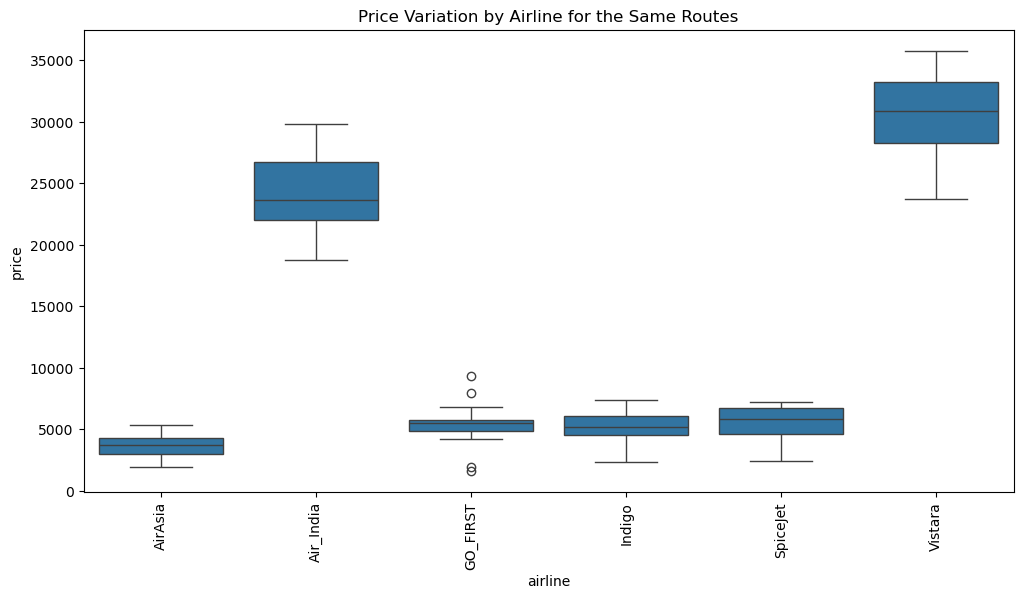

In [319]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=route_airline_price, x='airline', y='price')
plt.xticks(rotation=90)
plt.title("Price Variation by Airline for the Same Routes")
plt.show()


In [320]:
city_price_variation = df.groupby('source_city')['price'].std().reset_index().sort_values(by='price', ascending=False)

print(city_price_variation)


  source_city         price
1     Chennai  23527.227014
4     Kolkata  23439.972854
5      Mumbai  23394.131784
0   Bangalore  23171.386433
3   Hyderabad  21720.652723
2       Delhi  20920.410359


/var/folders/27/dpt9v8fj7fg0j3zd8j904zqc0000gn/T/ipykernel_1696/2052061533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='source_city', y='price', data=city_price_variation, palette='magma')


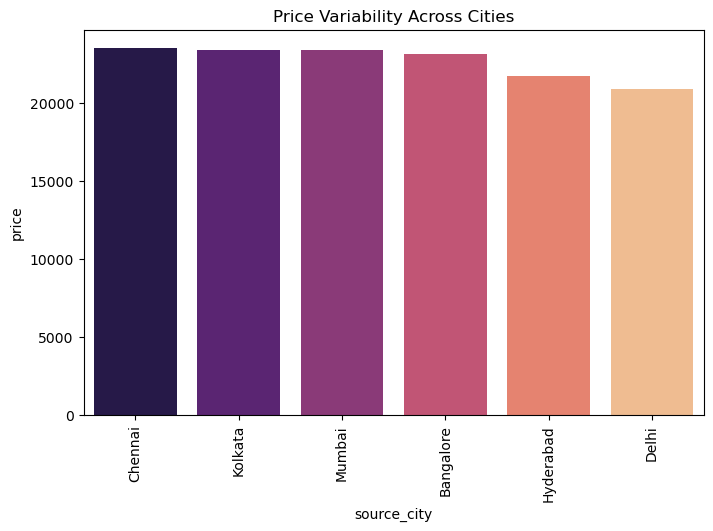

In [321]:
plt.figure(figsize=(8, 5))
sns.barplot(x='source_city', y='price', data=city_price_variation, palette='magma')
plt.xticks(rotation=90)
plt.title("Price Variability Across Cities")
plt.show()

# Class based price distribution

/var/folders/27/dpt9v8fj7fg0j3zd8j904zqc0000gn/T/ipykernel_1696/3903123758.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='price', data=class_prices, palette="viridis")


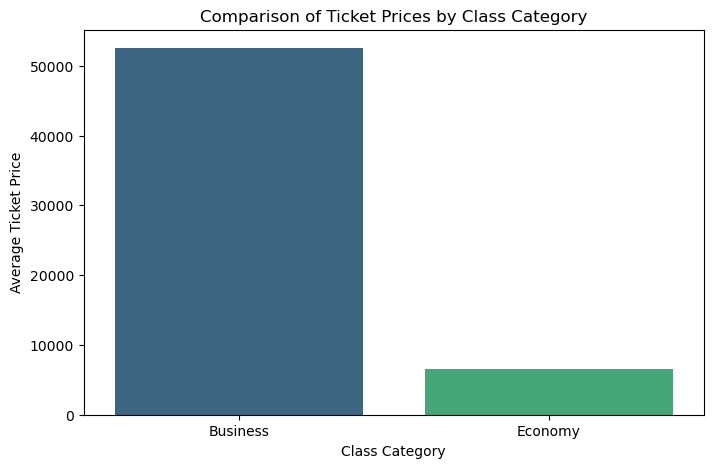

/var/folders/27/dpt9v8fj7fg0j3zd8j904zqc0000gn/T/ipykernel_1696/3903123758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='price', data=df, palette="muted")


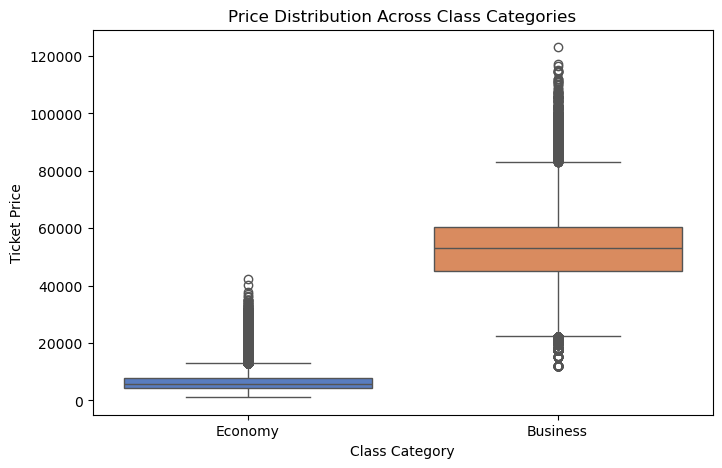

      class         price
0  Business  52540.081124
1   Economy   6572.342383


In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset (replace with your actual dataframe)
# df = pd.read_csv("your_data.csv")

# Compute the average price per class category
class_prices = df.groupby('class')['price'].mean().reset_index()

# 🎨 Bar plot to compare average prices
plt.figure(figsize=(8, 5))
sns.barplot(x='class', y='price', data=class_prices, palette="viridis")

plt.xlabel("Class Category")
plt.ylabel("Average Ticket Price")
plt.title("Comparison of Ticket Prices by Class Category")
plt.show()

# 🎨 Boxplot to see price distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x='class', y='price', data=df, palette="muted")

plt.xlabel("Class Category")
plt.ylabel("Ticket Price")
plt.title("Price Distribution Across Class Categories")
plt.show()

# Print the average price for each class
print(class_prices)


/var/folders/27/dpt9v8fj7fg0j3zd8j904zqc0000gn/T/ipykernel_1696/1916326970.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline', y='price', data=business_class_prices, palette="coolwarm")


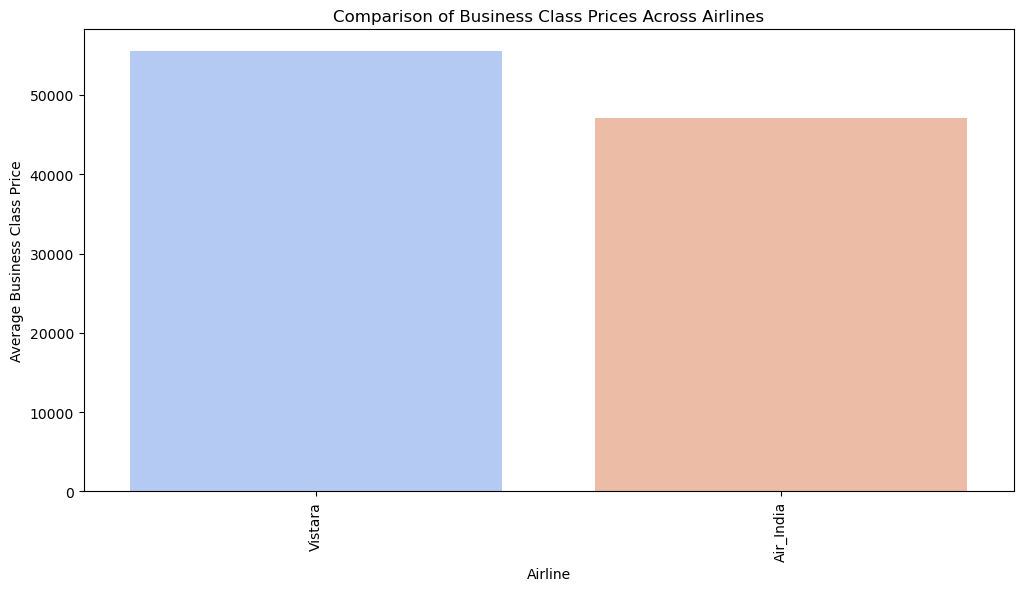

     airline         price
1    Vistara  55477.027777
0  Air_India  47131.039212


In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset (replace with actual data)
# df = pd.read_csv("your_data.csv")

# Filter only Business class fares
business_class_prices = df[df['class'] == 'Business'].groupby('airline')['price'].mean().reset_index()

# Sort airlines by price for better visualization
business_class_prices = business_class_prices.sort_values(by='price', ascending=False)

# 🎨 Bar plot for Business class pricing by airline
plt.figure(figsize=(12, 6))
sns.barplot(x='airline', y='price', data=business_class_prices, palette="coolwarm")

plt.xticks(rotation=90)
plt.xlabel("Airline")
plt.ylabel("Average Business Class Price")
plt.title("Comparison of Business Class Prices Across Airlines")
plt.show()

# Print the business class price comparison
print(business_class_prices)


# time based pricing trends

## a. analyze how departure time affects pricing

In [324]:
df['departure_period'] = df['departure_time'].apply(lambda x: 'Morning' if '06:00' <= x < '12:00' else
                                                      'Afternoon' if '12:00' <= x < '18:00' else 'Night')

departure_price = df.groupby('departure_period')['price'].mean().reset_index()

print(departure_price)


  departure_period         price
0            Night  20889.660523


/var/folders/27/dpt9v8fj7fg0j3zd8j904zqc0000gn/T/ipykernel_1696/3977567133.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='departure_period', y='price', data=departure_price, palette='Blues')


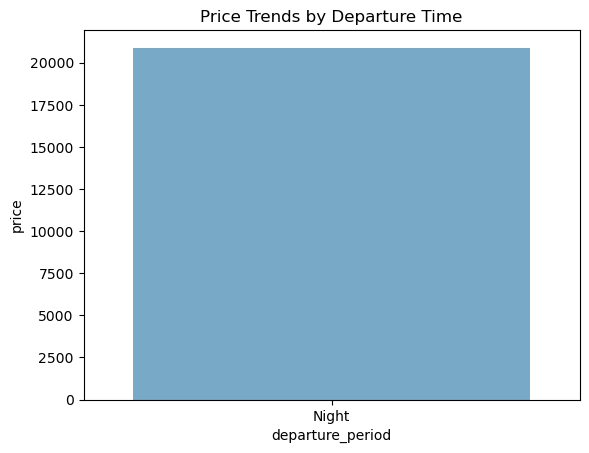

In [325]:
sns.barplot(x='departure_period', y='price', data=departure_price, palette='Blues')
plt.title("Price Trends by Departure Time")
plt.show()


## b. days left until departure vs. price

In [326]:
days_left_trend = df.groupby('days_left')['price'].mean().reset_index()

print(days_left_trend)


    days_left         price
0           1  21591.867151
1           2  30211.299801
2           3  28976.083569
3           4  25730.905653
4           5  26679.773368
5           6  24856.493902
6           7  25588.367351
7           8  24895.883995
8           9  25726.246072
9          10  25572.819134
10         11  22990.656070
11         12  22505.803322
12         13  22498.885384
13         14  22678.002363
14         15  21952.540852
15         16  20503.546237
16         17  20386.353949
17         18  19987.445168
18         19  19507.677375
19         20  19699.983390
20         21  19430.494058
21         22  19590.667385
22         23  19840.913451
23         24  19803.908896
24         25  19571.641791
25         26  19238.290278
26         27  19950.866195
27         28  19534.986047
28         29  19744.653119
29         30  19567.580834
30         31  19392.706612
31         32  19258.135308
32         33  19306.271739
33         34  19562.008266
34         35  19255

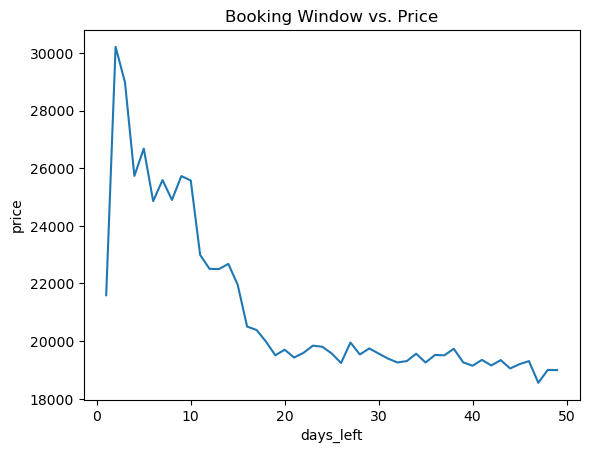

In [327]:
sns.lineplot(x='days_left', y='price', data=days_left_trend)
plt.title("Booking Window vs. Price")
plt.show()


## 5. Flight durations and stops impact on price
### a. Check if longer flights have higher prices

In [328]:
duration_price = df.groupby('duration')['price'].mean().reset_index()

print(duration_price)


     duration         price
0        0.83   1973.557692
1        0.92   2003.538462
2        1.00   2266.063660
3        1.08   2589.311031
4        1.17   2632.209375
..        ...           ...
471     44.50  32439.000000
472     45.83  25851.333333
473     47.08  17223.000000
474     47.75  31291.500000
475     49.83  20714.500000

[476 rows x 2 columns]


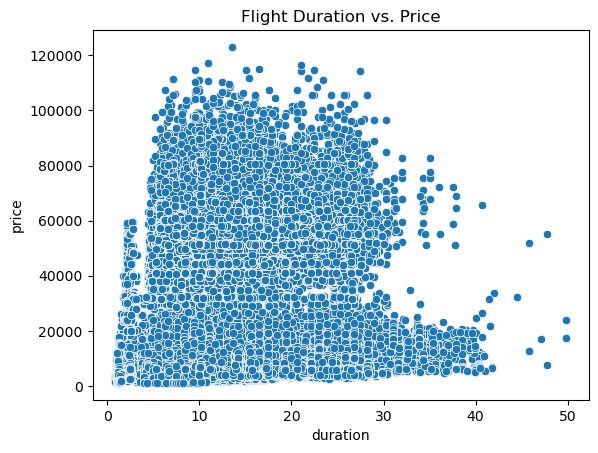

In [329]:
sns.scatterplot(x='duration', y='price', data=df)
plt.title("Flight Duration vs. Price")
plt.show()


### b. Compare direct vs. connecting flights pricing

stops_price = df.groupby('stops')['price'].mean().reset_index()

print(stops_price)


/var/folders/27/dpt9v8fj7fg0j3zd8j904zqc0000gn/T/ipykernel_1696/599121645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stops', y='price', data=price, palette='Oranges')


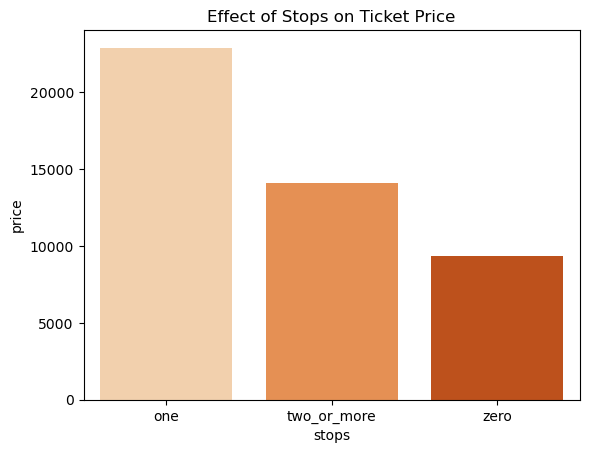

In [330]:
price = df.groupby('stops')['price'].mean().reset_index()
sns.barplot(x='stops', y='price', data=price, palette='Oranges')
plt.title("Effect of Stops on Ticket Price")
plt.show()


### c. Detect if ceratin layover cities cause price hikes

In [331]:
if 'layover_city' in df.columns:
    layover_price = df.groupby('layover_city')['price'].mean().reset_index().sort_values(by='price', ascending=False)
    print(layover_price)
else:
    print("The 'layover_city' column does not exist in the dataframe.")


The 'layover_city' column does not exist in the dataframe.


In [332]:
if 'layover_price' in locals():
    sns.barplot(x='layover_city', y='price', data=layover_price.head(10), palette='Purples')
    plt.xticks(rotation=90)
    plt.title("Most Expensive Layover Cities")
    plt.show()
else:
    print("The variable 'layover_price' is not defined.")


The variable 'layover_price' is not defined.


## 4. Route and demand-based analysis
### a. Identify high demand routes while the prices remain high

In [333]:
import pandas as pd

# Compute average price and flight frequency per route
route_demand = df.groupby(['source_city', 'destination_city'])['price'].agg(['mean', 'count']).reset_index()
route_demand = route_demand.rename(columns={'mean': 'avg_price', 'count': 'flight_count'})

# Identify high-demand routes (frequent flights & high price)
high_demand_routes = route_demand.sort_values(by=['flight_count', 'avg_price'], ascending=[False, False])

print(high_demand_routes.head(10))  # Top 10 high-demand routes


   source_city destination_city     avg_price  flight_count
14       Delhi           Mumbai  19355.829812         15289
27      Mumbai            Delhi  18725.320008         14809
10       Delhi        Bangalore  17880.216315         14012
1    Bangalore            Delhi  17723.313972         13756
4    Bangalore           Mumbai  23128.618672         12939
25      Mumbai        Bangalore  23147.873807         12885
29      Mumbai          Kolkata  22379.146723         12602
13       Delhi          Kolkata  20566.409418         11934
24     Kolkata           Mumbai  22078.883579         11467
11       Delhi          Chennai  19369.881354         10780


### b. Compare seasonal fluctuations for different routes

In [334]:
if 'date' in df.columns:
    df['month'] = pd.to_datetime(df['date']).dt.month  # Extract month from date
    seasonal_trends = df.groupby(['month', 'source_city', 'destination_city'])['price'].mean().reset_index()
    print(seasonal_trends)
else:
    print("The 'date' column does not exist in the dataframe.")


The 'date' column does not exist in the dataframe.


In [335]:
competition_prices = df.groupby(['source_city', 'destination_city', 'airline'])['price'].mean().reset_index()

print(competition_prices)


    source_city destination_city    airline         price
0     Bangalore          Chennai    AirAsia   2073.043478
1     Bangalore          Chennai  Air_India  26765.567702
2     Bangalore          Chennai   GO_FIRST   5351.945799
3     Bangalore          Chennai     Indigo   2363.326241
4     Bangalore          Chennai   SpiceJet   2613.310345
..          ...              ...        ...           ...
172      Mumbai          Kolkata  Air_India  23860.335825
173      Mumbai          Kolkata   GO_FIRST   6106.502609
174      Mumbai          Kolkata     Indigo   7415.243195
175      Mumbai          Kolkata   SpiceJet   7065.210689
176      Mumbai          Kolkata    Vistara  35223.862417

[177 rows x 4 columns]


### c. Compare prices for the same route form different airlines

In [336]:
competition_prices = df.groupby(['source_city', 'destination_city', 'airline'])['price'].mean().reset_index()

print(competition_prices)


    source_city destination_city    airline         price
0     Bangalore          Chennai    AirAsia   2073.043478
1     Bangalore          Chennai  Air_India  26765.567702
2     Bangalore          Chennai   GO_FIRST   5351.945799
3     Bangalore          Chennai     Indigo   2363.326241
4     Bangalore          Chennai   SpiceJet   2613.310345
..          ...              ...        ...           ...
172      Mumbai          Kolkata  Air_India  23860.335825
173      Mumbai          Kolkata   GO_FIRST   6106.502609
174      Mumbai          Kolkata     Indigo   7415.243195
175      Mumbai          Kolkata   SpiceJet   7065.210689
176      Mumbai          Kolkata    Vistara  35223.862417

[177 rows x 4 columns]


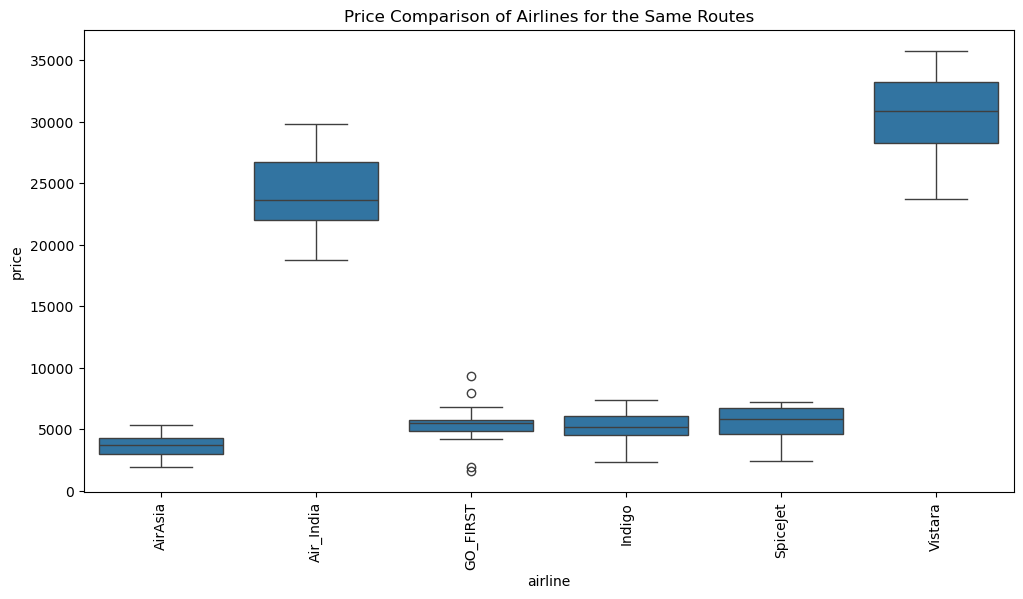

In [337]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=competition_prices, x='airline', y='price')
plt.xticks(rotation=90)
plt.title("Price Comparison of Airlines for the Same Routes")
plt.show()


### d. Identify route dominance by certain airlines

In [338]:
route_airline_share = df.groupby(['source_city', 'destination_city', 'airline']).size().reset_index(name='flight_count')

# Find dominant airlines for each route
dominant_airline = route_airline_share.loc[route_airline_share.groupby(['source_city', 'destination_city'])['flight_count'].idxmax()]

print(dominant_airline)


    source_city destination_city  airline  flight_count
5     Bangalore          Chennai  Vistara          3953
11    Bangalore            Delhi  Vistara          5423
17    Bangalore        Hyderabad  Vistara          4686
23    Bangalore          Kolkata  Vistara          4370
29    Bangalore           Mumbai  Vistara          5380
35      Chennai        Bangalore  Vistara          3932
41      Chennai            Delhi  Vistara          4145
47      Chennai        Hyderabad  Vistara          3052
53      Chennai          Kolkata  Vistara          2949
59      Chennai           Mumbai  Vistara          3958
65        Delhi        Bangalore  Vistara          5379
71        Delhi          Chennai  Vistara          4144
77        Delhi        Hyderabad  Vistara          4032
83        Delhi          Kolkata  Vistara          3973
89        Delhi           Mumbai  Vistara          5840
94    Hyderabad        Bangalore  Vistara          4372
100   Hyderabad          Chennai  Vistara       

## 6. Feature engineering insights
### a. Compute price per hour

In [339]:
df['price_per_hour'] = df['price'] / df['duration']  # Assuming 'duration' is in hours

print(df[['airline', 'price_per_hour']])


         airline  price_per_hour
0       SpiceJet     2743.317972
1       SpiceJet     2554.935622
2        AirAsia     2744.700461
3        Vistara     2646.666667
4        Vistara     2555.793991
...          ...             ...
300148   Vistara     6871.527778
300149   Vistara     7399.712092
300150   Vistara     5719.378163
300151   Vistara     8158.500000
300152   Vistara     8093.750000

[300153 rows x 2 columns]


### c. Identify pricing for direct vs. connecting flights

In [340]:
df['is_direct'] = df['stops'].apply(lambda x: 1 if x == 0 else 0)

# Compare prices
direct_vs_connecting = df.groupby('is_direct')['price'].mean().reset_index()
direct_vs_connecting['flight_type'] = direct_vs_connecting['is_direct'].map({1: 'Direct', 0: 'Connecting'})

print(direct_vs_connecting)


   is_direct         price flight_type
0          0  20889.660523  Connecting


/var/folders/27/dpt9v8fj7fg0j3zd8j904zqc0000gn/T/ipykernel_1696/1124430296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='flight_type', y='price', data=direct_vs_connecting, palette='viridis')


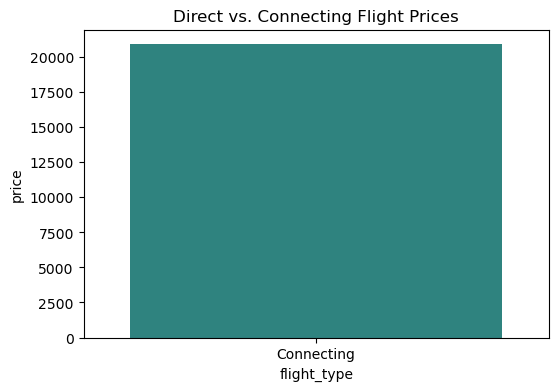

In [341]:
plt.figure(figsize=(6, 4))
sns.barplot(x='flight_type', y='price', data=direct_vs_connecting, palette='viridis')
plt.title("Direct vs. Connecting Flight Prices")
plt.show()


# **ONE HOT ENCODING**

In [342]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['airline'] = labelencoder.fit_transform(df['airline'])
df['source_city'] = labelencoder.fit_transform(df['source_city'])
df['destination_city'] = labelencoder.fit_transform(df['destination_city'])
df['arrival_time'] = labelencoder.fit_transform(df['arrival_time'])
df['departure_time'] = labelencoder.fit_transform(df['departure_time'])
df['stops'] = labelencoder.fit_transform(df['stops'])
df['class'] = labelencoder.fit_transform(df['class'])
df['departure_period'] = labelencoder.fit_transform(df['departure_period'])
df['flight'] = labelencoder.fit_transform(df['flight'])
df.shape
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_period,price_per_hour,is_direct
0,0,4,1408,2,2,2,5,5,1,2.17,1,5953,0,2743.317972,0
1,1,4,1387,2,1,2,4,5,1,2.33,1,5953,0,2554.935622,0
2,2,0,1213,2,1,2,1,5,1,2.17,1,5956,0,2744.700461,0
3,3,5,1559,2,4,2,0,5,1,2.25,1,5955,0,2646.666667,0
4,4,5,1549,2,4,2,4,5,1,2.33,1,5955,0,2555.793991,0


In [343]:
X=df.drop(['price'],axis=1)
Y=df['price']

## Splitting data for training and testing

In [344]:
from sklearn.model_selection import train_test_split

# 🔹 Splitting into training (70%), temporary (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# 🔹 Splitting temporary set into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Removing outliers from our data and visualizing whether there are outliers or not

In [345]:
import numpy as np

# Compute Q1, Q3, and IQR
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR  # Not always needed unless there are low outliers

# Remove outliers
outlier_mask = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_filtered = X_train[outlier_mask]
y_train_filtered = y_train[outlier_mask]


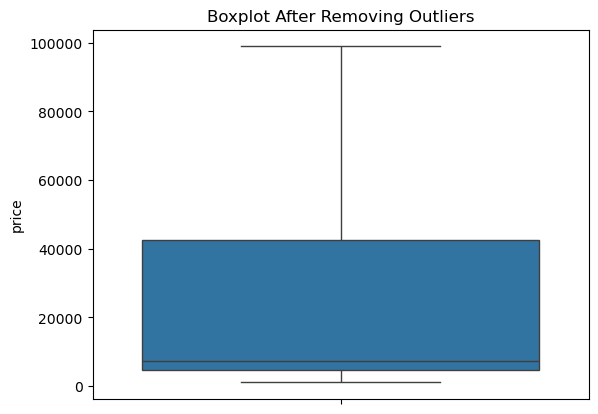

In [346]:
sns.boxplot(y_train_filtered)
plt.title("Boxplot After Removing Outliers")
plt.show()


## Model training

In [347]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=12, random_state=42)  # You can tune max_depth

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse=mean_squared_error(y_test, y_pred,squared=False)

print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {rmse:.2f}")

R2 Score: 0.9982
Mean Absolute Error: 500.00
Mean Squared Error: 953.71


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Checking how much our predicted prices resemble with actual price

In [348]:
import pandas as pd

comparison = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_pred})
print(comparison.sample(10))  # Check random samples



        Actual Price  Predicted Price
266088         31982     31982.000000
212227         60489     62258.684307
194126         10608      9908.298246
123073          9353      8726.681917
281866         56702     57400.166134
87678           3834      4085.150709
293116         61873     65167.031342
177596          4359      5648.425888
20626          14985     15735.057971
18823           6832      5964.927664


## Visualization of actual prices and predicted prices using scatter plot

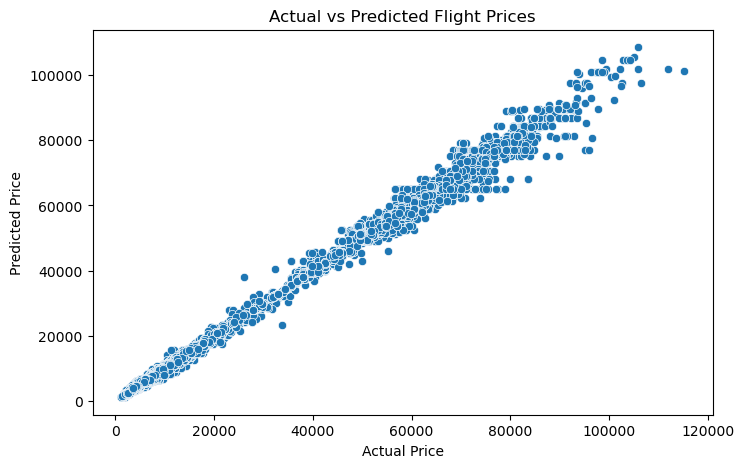

In [349]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Prices")
plt.show()
